# DESAFIO INDICIUM

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente que o core business é compra e venda de veículos usados. Essa empresa está com dificuldades na área de revenda dos automóveis usados em seu catálogo.

Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional, de forma a conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.

Seu objetivo é analisar os dados para responder às perguntas de negócios feitas pelo cliente e **criar um modelo preditivo que precifique os carros do cliente de forma que eles fiquem o mais próximos dos valores de mercado**. 

---

Antes de iniciar as análises, faz-se necessário verificar a qualidade dos dados fornecidos em termos de dados faltantes, dados duplicados, outliers, valores estranhos, etc.


In [95]:
# importar bibliotecas e definir opções do pandas e matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 1000)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2.0

sns.set_style('whitegrid')
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("notebook", font_scale=1.5)

In [96]:
# importar os dados em um dataframe
df = pd.read_csv('C:\\Users\\felip\\OneDrive\\projetos_python\\projects_datascience\\lighthouse_case\\main\\datasets\\raw\\cars_train.csv', sep='\t', encoding='utf-16')
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


In [97]:
# Verificar as informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

- A partir das informações iniciais, percebe-se que a coluna relativa ao número de fotos possui dados faltantes que serão complementados com a média do número de fotos; 
- As variáveis "ID" e "veiculo_alienado" não possuem informações relevantes para a análise exploratória e posterior modelagem dos dados e portanto serão excluídas;
- As demais colunas com dados faltantes necessitam de dados que correspondam a resposta "Não".

In [98]:
df.num_fotos.fillna(df.num_fotos.mean(), inplace=True)
df.fillna(0, inplace=True)
df.drop(['id', 'veiculo_alienado', 'elegivel_revisao'], axis=1, inplace=True)

In [99]:
# Tratamentos para os NaN e dados nas colunas
lista_colunas_binarias = ['dono_aceita_troca', 'veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado']
lista_object = ['blindado', 'tipo_vendedor', 'entrega_delivery', 'troca', 'elegivel_revisao']

def substituir_zero_por_nao(df, lista_colunas):
    for coluna in lista_colunas:
        if coluna in df.columns:
            df[coluna] = df[coluna].apply(lambda x: "Não" if x == 0 else "Sim")
    return df

df = substituir_zero_por_nao(df, lista_colunas_binarias)

- Breve descrição dos dados categóricos com destaques para os valores que mais aparecem no conjunto de dados
    - Percebe-se que veículos da marca volkswagen foram os mais vendidos de acordo com essa base dos dados, em relação ao modelo, o Compass da Jeep foi o mais negociado. 
    - Carros com transmissão automática foram os mais negóciados e o tipo de veículo foram os Sedãs. 
    - Também percebe-se que a grande maioria dos veículos vendidos foram da cor branca e não são blindados. 
    - A cidade e o estado de São Paulo foram o local com o maior número de registro dessa base de dados.

Outras estatísticas serão mais detalhadas ao longo da exploração dos dados.

In [100]:
df.describe(include='object').T

,count,unique,top,freq
marca,29584,40,VOLKSWAGEN,4594
modelo,29584,457,COMPASS,1480
versao,29584,1916,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,1352
cambio,29584,7,Automática,22545
tipo,29584,7,Sedã,16429
blindado,29584,2,N,29336
cor,29584,7,Branco,20949
tipo_vendedor,29584,2,PF,17926
cidade_vendedor,29584,575,São Paulo,6158
estado_vendedor,29584,25,São Paulo (SP),16378


#### As primeiras análises serão feitas em relação ao preço dos veículos.

In [101]:
print(f'O preço dos veículos usados varia de R$ {df.preco.min():.2f} até R$ {df.preco.max():.2f}.')

O preço dos veículos usados varia de R$ 9869.95 até R$ 1359812.89.


- Ou seja, há veículos partindo de menos de **dez mil reais** até **mais de 1 milhão**. 
- A seguir, observa-se a distruição do preço dos veículos, na qual se percebe que a maioria dos veículos está na faixa de **R$ 100.000**! 

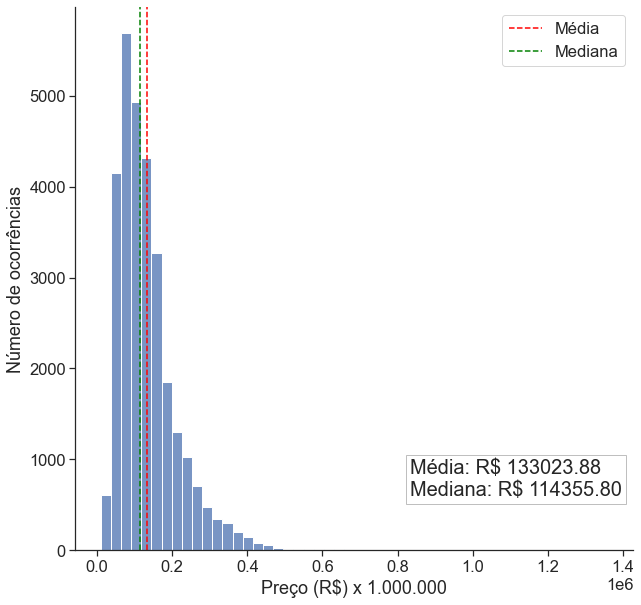

In [102]:
# Distribuição de preços dos veículos usados e seu valor médio e sua mediana
sns.histplot(x='preco', data=df, bins=50)

media = df['preco'].mean()
mediana = df['preco'].median()
plt.axvline(x=media, color='red', linestyle='--', label='Média')
plt.axvline(x=mediana, color='green', linestyle='--', label='Mediana')

texto = f'Média: R$ {media:.2f}\nMediana: R$ {mediana:.2f}'
plt.text(0.6, 0.1, texto, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', alpha=0.5), fontsize=20)
plt.ylabel('Número de ocorrências')
plt.xlabel('Preço (R$) x 1.000.000')
plt.legend()
plt.show()

#### Fatores que contribuem para o preço dos automóveis

- Em primeiro lugar, analisou-se a influência do tipo de câmbio no preço dos veículos vendidos e, como esperado, carros com câmbio automático são os mais caros, em média, do que carros com câmbio manual; 

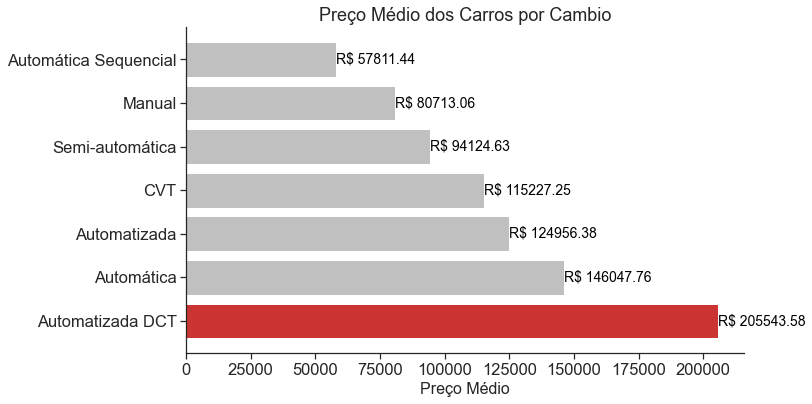

In [103]:
def preco_medio_por_agregacao(df, preco, coluna):
    """
    Gera um gráfico de barras horizontais com o preço médio dos carros por tipo de agregação.

    Parâmetros:
    - df: DataFrame contendo os dados dos carros.
    - preco: Nome da coluna que contém os preços dos carros.
    - coluna: Nome da coluna para realizar a agregação.

    Retorna:
    - None
    """
    agregacoes = df.groupby(coluna)[preco].mean().sort_values(ascending=False)
    cores = ['#CA3433' if item == agregacoes.index[0] else '#C0C0C0' for item in agregacoes.index]

    plt.figure(figsize=(10, 6))
    plt.barh(agregacoes.index, agregacoes.values, color=cores)
    plt.xlabel('Preço Médio', fontsize=16)
    plt.title(f'Preço Médio dos Carros por {coluna.capitalize()}', fontsize=18)

    for i, valor in enumerate(agregacoes.values):
        plt.text(valor + 50, i, f'R$ {valor:.2f}', ha='left', va='center', fontsize=14, color='black')

    plt.show()


preco_medio_por_agregacao(df, 'preco', 'cambio')

#### Influência da cor

- O consumidor tem uma ideia na hora de comprar o seu veículo de que certas cores são mais valorizadas na hora de uma futura revenda. Será que essa hipótese se confirma nos dados a seguir?
- Percebe-se que os carros mais caros são os da cor cinza, com uma diferença de mais de 10% na valorização em comparação com os carros pretos que estão em segundo lugar. O Top 3 é fechado com carros da cor branca e ainda há carros com a cor prata fechando o estudo. 
- Carros de outras cores, como vermelho, tiveram a pior valorização no estudo;
- Já analisando-se o número de carros vendidos por cada tipo de cor, o Top 3 seria branco, preto e prata, com grande folga para a cor branca.

Portanto, a escolha da cor do veículo ainda faz diferença na hora da revenda.

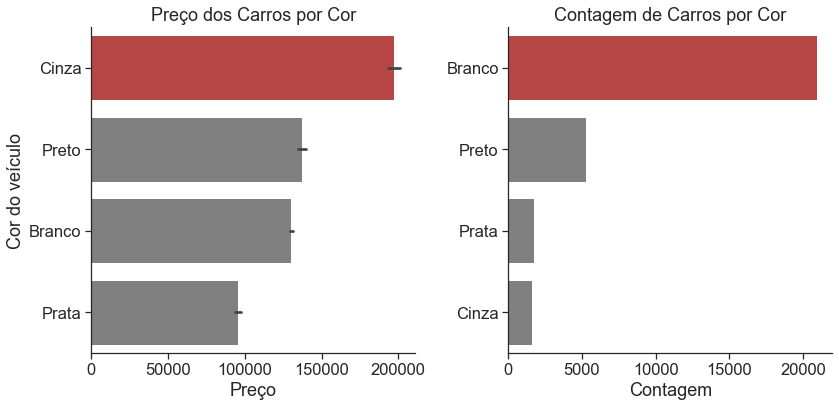

In [104]:
# Definir as cores

ordem_cor = ['Cinza', 'Preto', 'Branco', 'Prata']
ordem_cor2 = ['Branco', 'Preto', 'Prata', 'Cinza']

cores = ['#CA3433'] + ['gray'] * (len(ordem_cor) - 1)
cores2 = ['#CA3433'] + ['gray'] * (len(ordem_cor2) - 1)

# Criar a figura e as subfiguras
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotar o countplot na primeira subfigura
sns.countplot(y='cor', data=df, ax=axes[1], palette=cores2, order=ordem_cor2[:4])
axes[1].set_title('Contagem de Carros por Cor')
axes[1].set_xlabel('Contagem')
axes[1].set_ylabel('')

# Plotar o barplot na segunda subfigura
sns.barplot(x='preco', y='cor', data=df, order=ordem_cor, ax=axes[0], palette=cores)
axes[0].set_title('Preço dos Carros por Cor')
axes[0].set_xlabel('Preço')
axes[0].set_ylabel('Cor do veículo')

# Ajustar o espaçamento entre as subfiguras
plt.tight_layout()

# Exibir o gráfico
plt.show()


#### Análise de condições **indiretas** do veículo

- O cuidado com o veículo é de grande importância na hora da revenda, então, fazer as revisões na concessionária ou mesmo o veículo ser de apenas um único dono faz diferença no preço final?
- A partir da análise gráfica a seguir, percebe-se que certos cuidados como os citados anteriormente fazem a diferença no preço final do carro usado.
    - Só o fato do veículo ser de único dono já faz uma diferença de 9% em média;
    - Realizar as revisões programadas na própria concessionária valoriza em torno de 20% no preço de revenda do usado;
    - A questão do IPVA estar pago ou não, não faz diferença no preço final. Provavelmente isso está relacionado mais ao período do ano em que é realizada a venda, o que não é observado nos dados em questão;
    - Ainda ter garantia de fábrica faz grande diferença no preço do usado, com valorização de 25% em média;
    - Por fim, observa-se que realizar revisões periódicas no veículo é de grande importância, pois garante uma valorização de 16% em média.

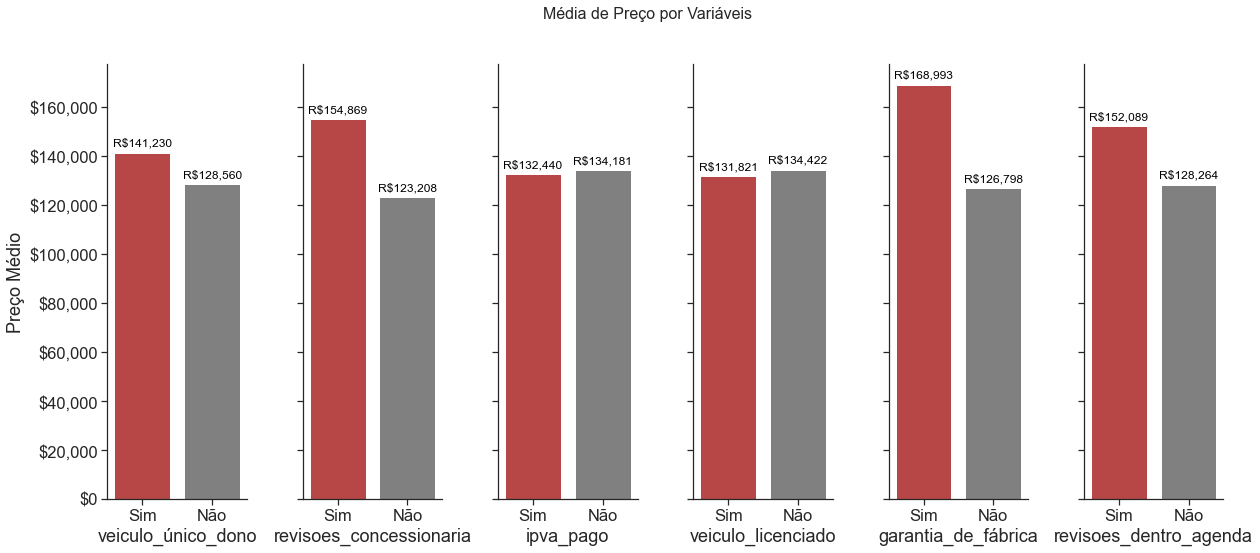

In [105]:
# Lista de colunas a serem analisadas
colunas = ['veiculo_único_dono', 'revisoes_concessionaria', 'ipva_pago', 'veiculo_licenciado', 'garantia_de_fábrica', 'revisoes_dentro_agenda']

fig, axes = plt.subplots(1, len(colunas), figsize=(20, 8), sharey=True)
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Média de Preço por Variáveis', fontsize=16)

for i, coluna in enumerate(colunas):
    # Cálculo da média de preço para cada valor da coluna
    media_preco = df.groupby(coluna)['preco'].mean().reindex(['Sim', 'Não'])
    
    cores = ['#CA3433', 'gray']
    
    sns.barplot(x=media_preco.index, y=media_preco.values, ax=axes[i], palette=cores)    
    axes[i].set_xlabel(coluna)
    axes[0].set_ylabel('Preço Médio')
    axes[i].set_ylabel('')
    axes[i].yaxis.set_major_formatter('${x:,.0f}')
    
    for p in axes[i].patches:
        axes[i].annotate(f'R${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')
plt.show()

#### Tipo de venda

- Quanto ao tipo de venda, é possível conseguir um desconto quando comprado por delivery;
- Também há uma diminuição na valorização do veículo se ele foi trocado anteriormente.

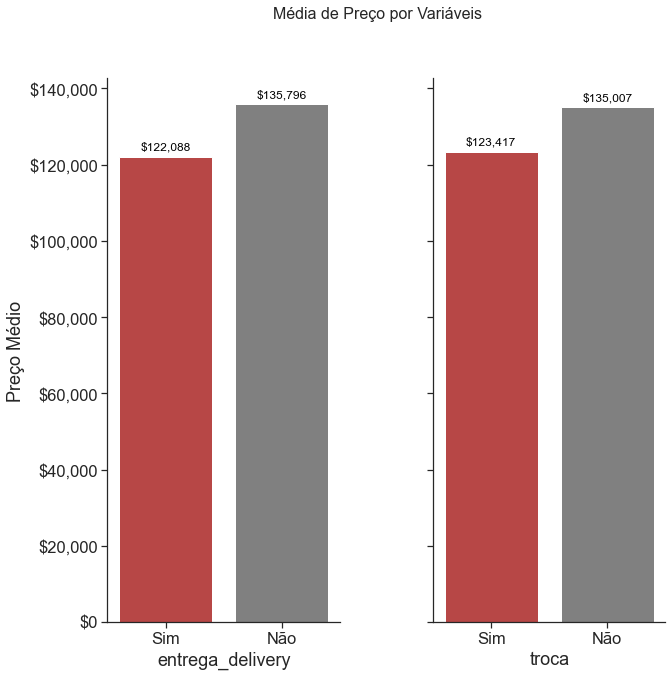

In [106]:
colunas = ['entrega_delivery', 'troca']

df[colunas] = df[colunas].replace({True: 'Sim', False: 'Não'})

fig, axes = plt.subplots(1, len(colunas), sharey=True)
plt.subplots_adjust(wspace=0.4)
fig.suptitle('Média de Preço por Variáveis', fontsize=16)
for i, coluna in enumerate(colunas):
    # Cálculo da média de preço para cada valor da coluna
    media_preco = df.groupby(coluna)['preco'].mean().reindex(['Sim', 'Não'])
    
    cores = ['#CA3433', 'gray']
    
    sns.barplot(x=media_preco.index, y=media_preco.values, ax=axes[i], palette=cores)  
    axes[i].set_xlabel(coluna)
    axes[0].set_ylabel('Preço Médio')
    axes[i].set_ylabel('')
    axes[i].yaxis.set_major_formatter('${x:,.0f}')
    for p in axes[i].patches:
        axes[i].annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')
plt.show()

- Venda de veículos entre pessoas físicas (PF) é mais vantajoso? 
    - Em média sim! Em geral, vender veículos entre PF é mais vantajoso, com uma diferença de cerca de 10% no valor final de revenda.

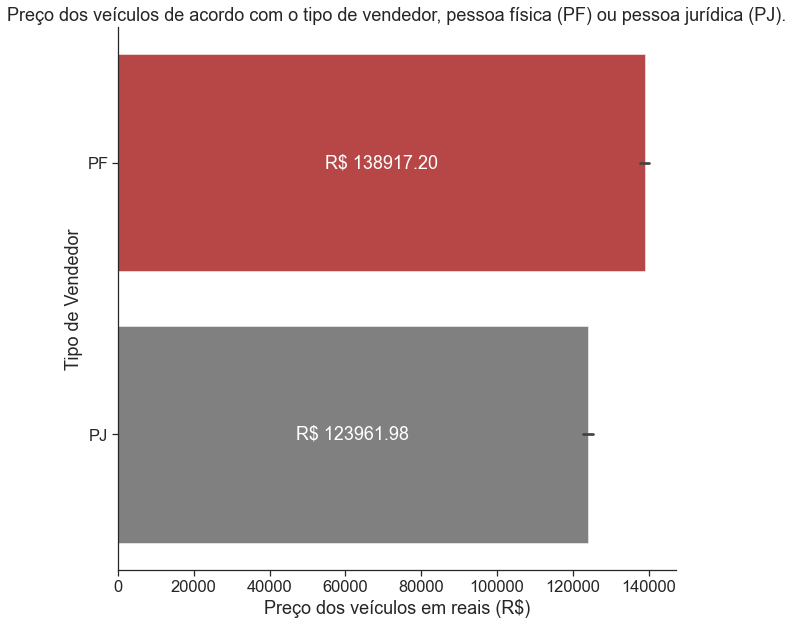

In [107]:
cores = ['#CA3433', 'gray']
ax = sns.barplot(x='preco', y='tipo_vendedor', data=df, palette=cores, linewidth=0.5)
plt.title('Preço dos veículos de acordo com o tipo de vendedor, pessoa física (PF) ou pessoa jurídica (PJ).')
plt.xlabel('Preço dos veículos em reais (R$)')
plt.ylabel('Tipo de Vendedor')

for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()
    
    plt.text(x + width/2, y + height/2, f'R$ {width:.2f}', ha='center', va='center', color='white', fontsize=18)

plt.show()


#### Automóveis de marca populares

- Para essa questão, foram feitas duas abordagens: 
    1. Levou-se apenas em consideração a marca do veículo e não seus modelos, apesar da gama variada de veículos correspondente a cada marca; 
    2. Foram considerados os veículos de entrada mais vendidos no ano de 2022, segundo a revista Auto Esporte. 
        - São eles: **HB20, ONIX, MOBI, GOL, ARGO, KWID e 208**. Todos integrantes do Top20 naquele ano. 

---

In [108]:
media_popular_1 = df[(df['marca'] == 'VOLKSWAGEN') | (df['marca'] == 'CHEVROLET') | (df['marca'] == 'HYUNDAI') | (df['marca'] == 'FIAT') | (df['marca'] == 'FORD')]['preco'].mean()
print(f'Média dos automóveis de marcas populares: R$ {media_popular_1:.2f}')

Média dos automóveis de marcas populares: R$ 104634.68


In [109]:
# definição da média de preços dos automóveis populares
media_popular_2 = df[(df['modelo'] == 'GOL') | (df['modelo'] == 'HB20') | (df['modelo'] == 'ARGO') | (df['modelo'] == '208') | (df['modelo'] == 'ONIX') | (df['modelo'] == 'KWID')]['preco'].mean()
print(f'Média dos automóveis de entrada mais vendidos em 2022: R$ {media_popular_2:.2f}')

Média dos automóveis de entrada mais vendidos em 2022: R$ 78529.69


- Foram feitas 3 perguntas de negócio: 

a) Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?


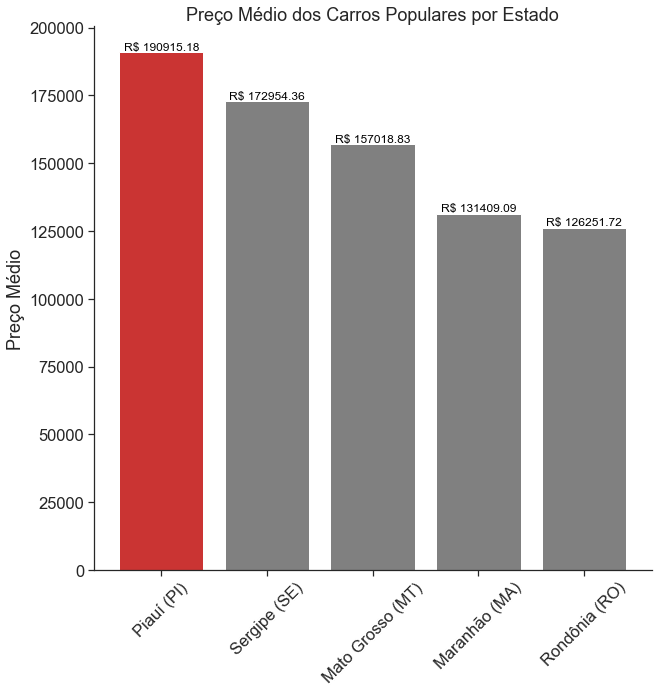

In [110]:
def preco_popular_por_estado(df, carro_popular, preco, estado, top_estados, ordem):
    """
    Gera um gráfico de barras com o preço médio dos carros populares por estado.

    Parâmetros:
    - df: DataFrame contendo os dados dos carros.
    - carro_popular: Opção 1 ou 2 para selecionar a definição de carros populares.
        - 1: Carros populares por marca (VOLKSWAGEN, CHEVROLET, HYUNDAI, FIAT, FORD).
        - 2: Carros populares por modelo (GOL, HB20, ARGO, 208, ONIX, KWID).
    - preco: Nome da coluna que contém os preços dos carros.
    - estado: Nome da coluna que representa os estados.
    - top_estados: Número de estados a serem incluídos no gráfico.
    - ordem: Ordenação dos estados no gráfico.
        - 'caros': Os estados com os carros populares mais caros serão mostrados.
        - 'baratos': Os estados com os carros populares mais baratos serão mostrados.
    
    Retorna:
    - None

    """
    if carro_popular == 1:
        carros_populares = df[(df['marca'] == 'VOLKSWAGEN') | (df['marca'] == 'CHEVROLET') | (df['marca'] == 'HYUNDAI') | (df['marca'] == 'FIAT') | (df['marca'] == 'FORD')]
    elif carro_popular == 2:
        carros_populares = df[(df['modelo'] == 'GOL') | (df['modelo'] == 'HB20') | (df['modelo'] == 'ARGO') | (df['modelo'] == '208') | (df['modelo'] == 'ONIX') | (df['modelo'] == 'KWID')]
    else:
        print('Essa função só aceita 1 ou 2 como opção.')

    media_preco_por_estado = carros_populares.groupby(estado)[preco].mean()
    if ordem == 'caros':
        estados_ordenados = media_preco_por_estado.sort_values(ascending=False).head(top_estados)
    elif ordem == 'baratos':
        estados_ordenados = media_preco_por_estado.sort_values(ascending=True).head(top_estados)
    else:
        raise ValueError("O parâmetro 'ordem' deve ser 'caros' ou 'baratos'.")
    
    cores = ['#CA3433' if estado == estados_ordenados.index[0] else 'gray' for estado in estados_ordenados.index]

    plt.bar(estados_ordenados.index, estados_ordenados.values, color=cores)
    plt.xlabel('')
    plt.ylabel('Preço Médio')
    plt.title('Preço Médio dos Carros Populares por Estado')
    plt.xticks(rotation=45)

    for i, valor in enumerate(estados_ordenados.values):
        plt.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=12, color='black')

    plt.show()

preco_popular_por_estado(df, 1, 'preco', 'estado_vendedor', 5, 'caros')


- Como se pode perceber, em média, o veículo de marcas populares é vendido por mais de 170 mil no estado do Piauí (PI). Então esse seria o estado mais indicado para vender veículos dessas marcas. 
- Já se o usuário for comprar um veículo de marca popular, o estado com a menor valorização é o estado de Roraima (RR), com valor médio em cerca de 60 mil.

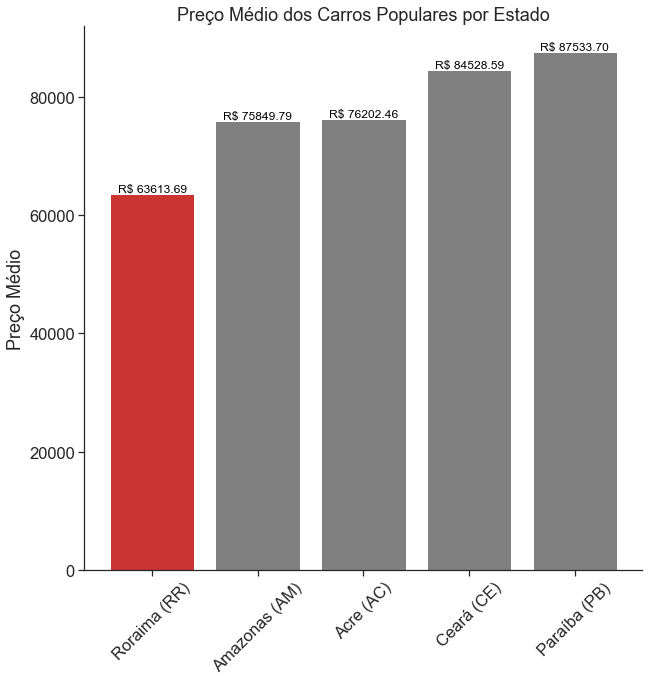

In [111]:
preco_popular_por_estado(df, 1, 'preco', 'estado_vendedor', 5, 'baratos')

b) Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?


C:\Users\felip\AppData\Local\Temp\ipykernel_13232\907313235.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(picapes_mais_caras.index, rotation=45)


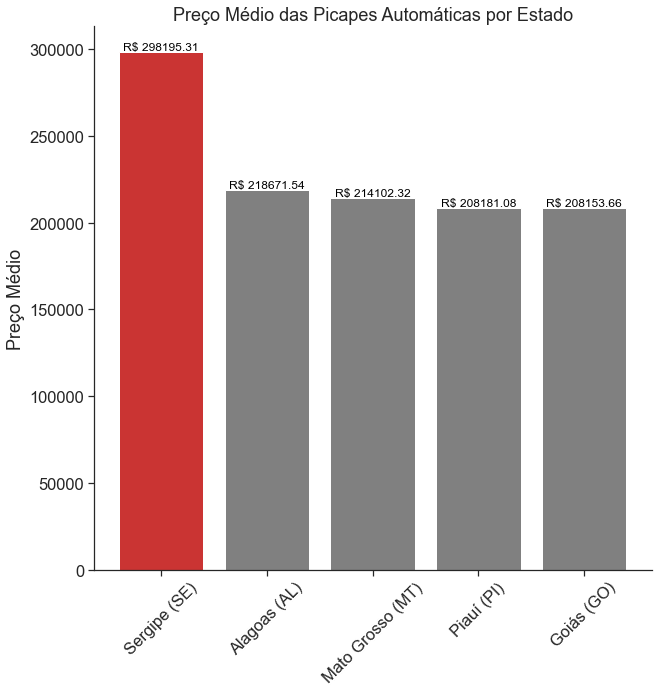

In [112]:
picares_automaticas = df[(df['tipo'] == 'Picape') & (df['cambio'] == 'Automática')]

picapes_mais_caras = picares_automaticas.groupby('estado_vendedor')['preco'].mean().sort_values(ascending=False).head(5)

cores = ['#CA3433' if estado == picapes_mais_caras.index[0] else 'gray' for estado in picapes_mais_caras.index]

fig, ax = plt.subplots()
ax.bar(picapes_mais_caras.index, picapes_mais_caras.values, color=cores)
ax.set_xlabel('')
ax.set_ylabel('Preço Médio')
ax.set_title('Preço Médio das Picapes Automáticas por Estado')
ax.set_xticklabels(picapes_mais_caras.index, rotation=45)

for i, valor in enumerate(picapes_mais_caras.values):
    ax.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show() 


- O melhor estado para se vender uma picape com transmissão automática é o estado de Sergipe(SE) com preço médio superando os 250 mil reais. Bem a frente do segundo colocado que é o estado do Piauí (PI).

c) Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

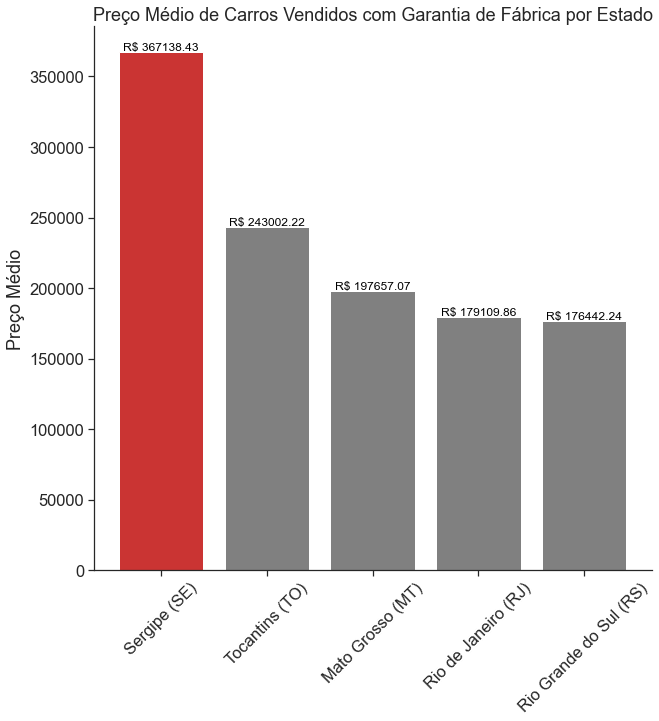

In [113]:
garantia_de_fabrica = df[df['garantia_de_fábrica'] == "Sim"]

melhor_preco_com_garantia = garantia_de_fabrica.groupby('estado_vendedor')['preco'].mean().sort_values(ascending=False).head(5)

cores = ['#CA3433' if estado == melhor_preco_com_garantia.index[0] else 'gray' for estado in melhor_preco_com_garantia.index]

plt.bar(melhor_preco_com_garantia.index, melhor_preco_com_garantia.values, color=cores)
plt.xlabel('')
plt.ylabel('Preço Médio')
plt.title('Preço Médio de Carros Vendidos com Garantia de Fábrica por Estado')
plt.xticks(rotation=45)

for i, valor in enumerate(melhor_preco_com_garantia.values):
    plt.text(i, valor, f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


- O estado com maior valorização de carros com garantia de fábrica é o estado de Sergipe (SE) com preço passando dos 350 mil reais.

#### Outras métricas importantes

- Número de fotos impacta no valor de venda?
- Ano de fabricação/ano do modelo do veículo impacta muito no preço de revenda?
- O quão o preço está relacionado com a quilometragem do veículo? 

Essas informações podem ser obtidas no gráfico abaixo, em que percebe-se pelos diagramas contidos na diagonal que a maioria dos veículos possuem menos de 10 fotos e não parece existir uma correlação entre o preço e o número de fotos; Ainda percebe-se que a maioria dos veículos vendidos são fabricados/modelos do ano de 2010 até o presente;

Pode-se notar também que há uma correlação positiva entre preço e ano do veículo. E também uma correlação negativa entre preço e quilometragem registrada no hodômetro, o que já é esperado.

Por fim, não foi possível verificar uma relação entre preço e número de portas devido a grande diferença no conjunto de dados quanto a carros de duas portas que praticamente não são vendidos.

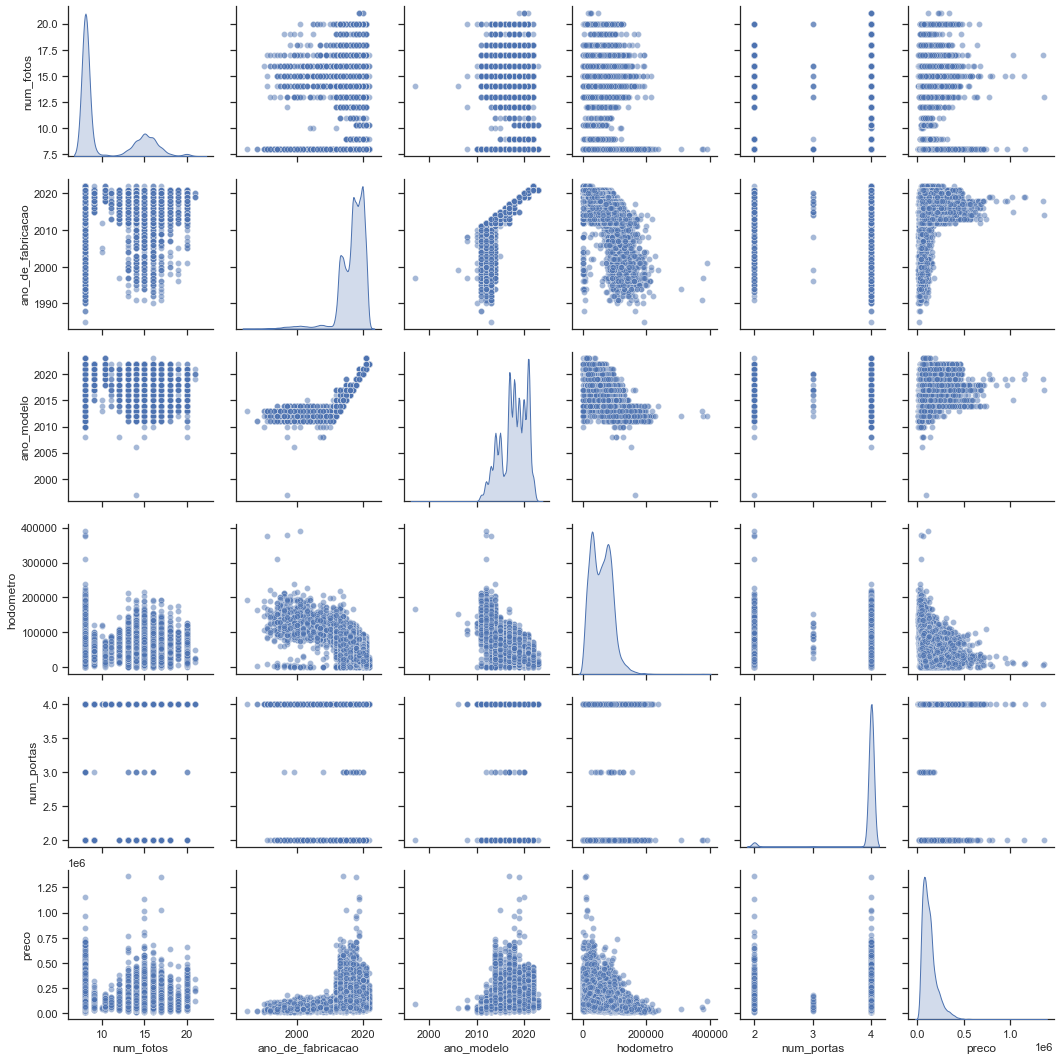

In [114]:
# Selecionar as colunas numéricas do dataframe
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Filtrar o dataframe mantendo apenas as colunas numéricas
df_numericas = df[colunas_numericas]

# Criar o pairplot com a diagonal inferior
sns.set(style="ticks")
sns.pairplot(df_numericas, diag_kind="kde", plot_kws={"alpha": 0.5})

#### Correlação entre as variáveis

- De acordo com o gráfico de calor apresentado abaixo, percebe-se que poucas variáveis tem fortes correlações umas com as outras o que será mais explorado em seguida.

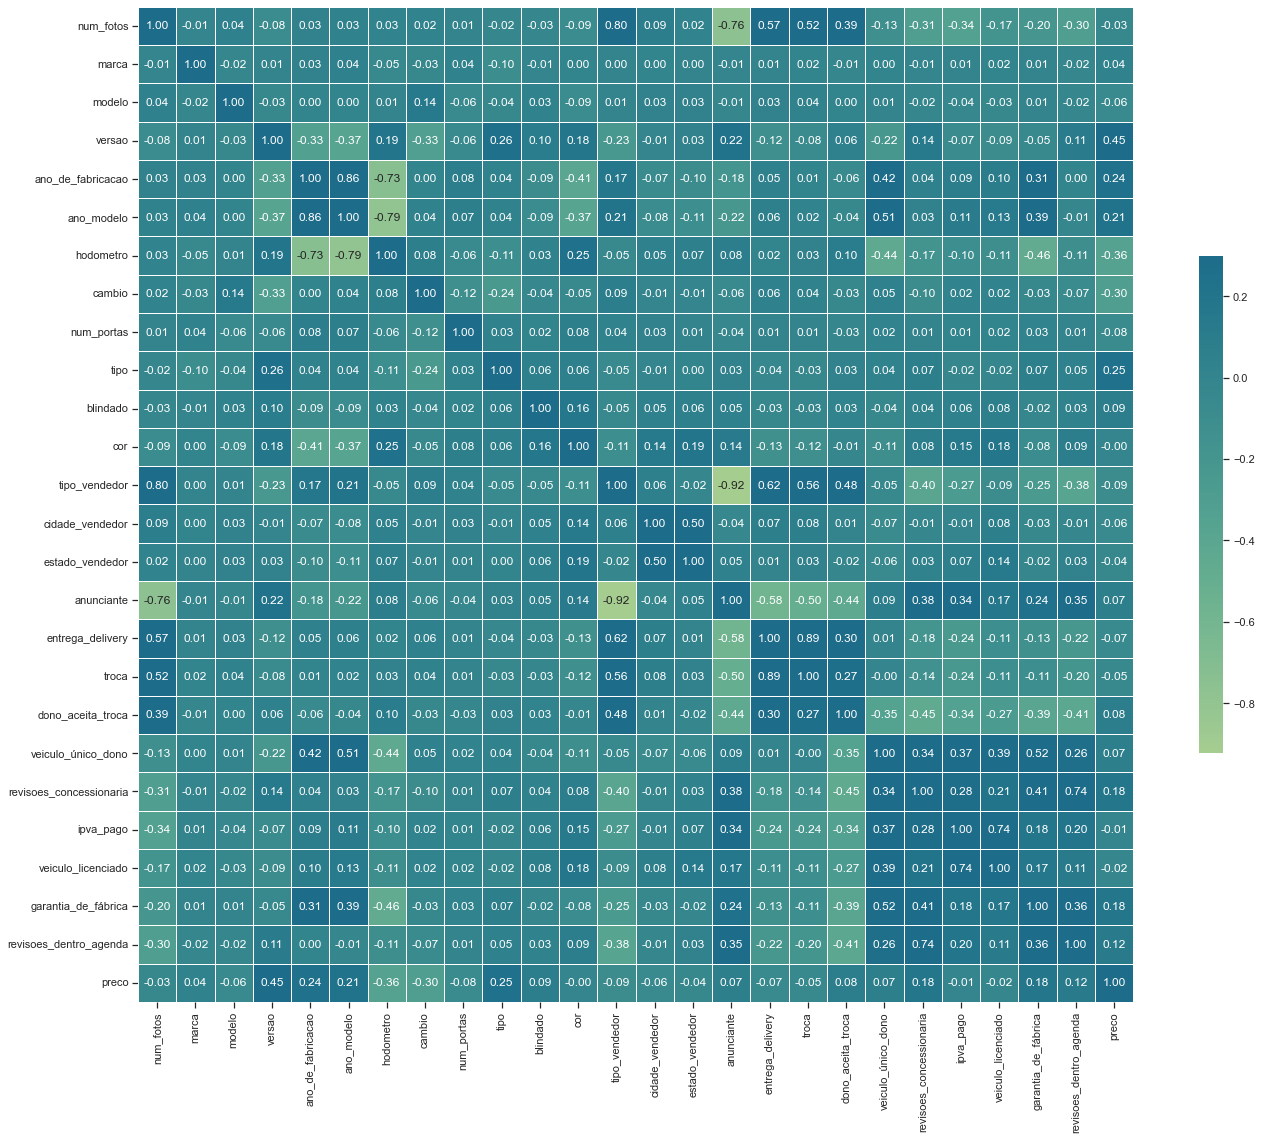

In [115]:
dataframe = df.copy()
for coluna in dataframe.select_dtypes(include=['object', 'bool']).columns:
    dataframe[coluna] = dataframe[coluna].astype('category').cat.codes

def plot_heatmap(corr: pd.DataFrame, figsize: tuple = (20, 16)) -> None:
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(corr, cmap="crest", vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', ax=ax)
    fig.tight_layout()

corr = dataframe.corr(method='pearson')
plot_heatmap(corr, figsize=(20, 16))

plt.show()

- Para melhor analisar as maiores correlações entre as variáveis, excetuando-se a variável target "preço", pegou-se as correlações maiores que 75% como pode-se verificar abaixo.
    - Há uma alta correlação entre o número de fotos e o tipo de vendedor e o anunciante da venda;
    - Como esperado, há uma grande relação entre ano de fabricação e o ano do modelo;
    - Também se confirma o que já foi observado para ano do modelo e a quantidade de quilometros rodados pelo veículo;
    - As maiores correlações foram entre tipo de vendedor e anunciante, já que as duas variáveis informam basicamente as mesmas coisas; e também entre entrega por delivery e se o veículo já foi trocado anteriormente.
Os valores podem ser vistos em detalhes abaixo!

In [116]:
corr_to_analysis = []

for item in corr.columns:
    strong_corr = zip(corr[item].abs().sort_values(ascending=False)[1:4].index, corr[item].abs().sort_values(ascending=False)[1:4].values)
    for index, value in strong_corr:
        if value >= 0.75 and ((item, index, value) not in corr_to_analysis and (index, item, value) not in corr_to_analysis):
            corr_to_analysis.append((item, index, value))
corr_to_analysis

[('num_fotos', 'tipo_vendedor', 0.7958501209379424),
 ('num_fotos', 'anunciante', 0.7574007962956191),
 ('ano_de_fabricacao', 'ano_modelo', 0.8603149189952286),
 ('ano_modelo', 'hodometro', 0.7900622496297423),
 ('tipo_vendedor', 'anunciante', 0.9232669394639256),
 ('entrega_delivery', 'troca', 0.8933321844988867)]

#### Conclusões da Análise Exploratória 

- Existe uma grande variação de preços dos automóveis, partindo de carros populares até carros de luxo;
- A cor do veículo influencia no preço de revenda; 
- Cuidados com a manutenção do veículo fazem a diferença (Revisões feitas na concessionária); 
- Carros com câmbio automático são a grande maioria do conjunto de dados e possuem valor de revenda maior que os com câmbio manual; 
- Mais da metade dos dados são do estado de São Paulo, o que pode levar a uma tendência nos resultados. 
    - Isso deve ser melhor avaliado com o cliente a fim de verificar se há necessidade de criar modelos preditivos pra cada região, ou estado da federação por exemplo;
- Outras conclusões estão distribuídas ao longo do notebook!